TASK =  Segment Customers Based on Purchasing Behavior

1. import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

2. Load Dataset

In [2]:
df = pd.read_csv('customer_sale.csv')
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


3. Select Features for Clustering

In [3]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

4. Feature Scaling

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

5. PCA for Visualization (2D)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f'Explained Variance Ratio : {pca.explained_variance_ratio_}')

Explained Variance Ratio : [0.49552284 0.29131648]


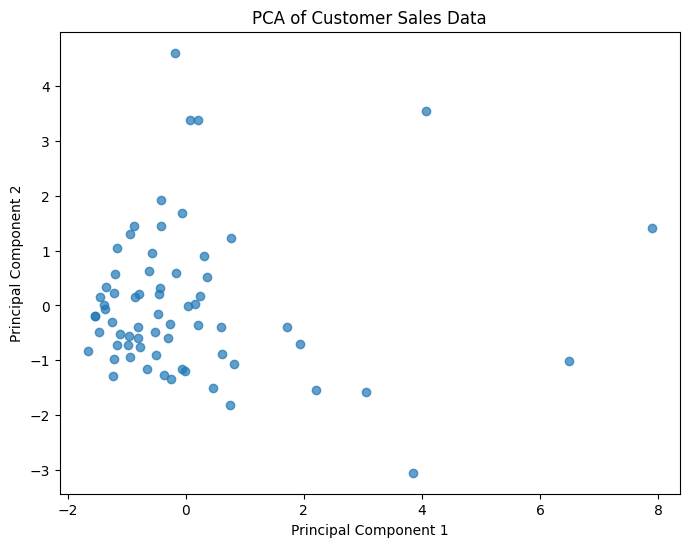

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],alpha = 0.7)
plt.title('PCA of Customer Sales Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

6. Elbow Method (Find Optimal K)

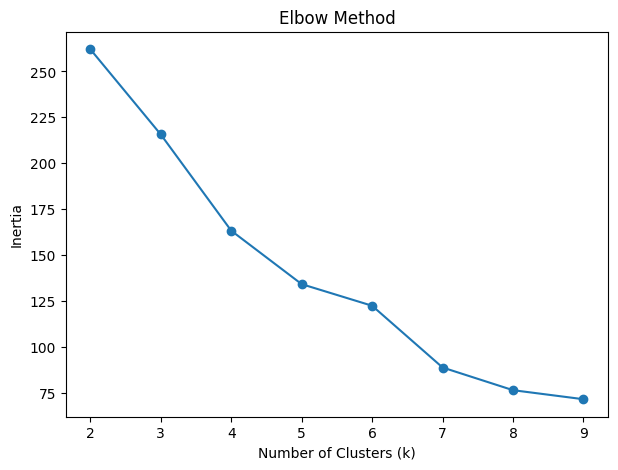

In [7]:
inertia = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(2,10), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


7. Silhouette Score

In [12]:
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled , cluster_labels)
    print(f'for k = {k}, silhouette score is {score : .2f}')

for k = 2, silhouette score is  0.59
for k = 3, silhouette score is  0.33
for k = 4, silhouette score is  0.35
for k = 5, silhouette score is  0.37
for k = 6, silhouette score is  0.26
for k = 7, silhouette score is  0.30
for k = 8, silhouette score is  0.28
for k = 9, silhouette score is  0.19


8. Apply K-Means Clustering (Final Model)

In [13]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

9. Visualize Clusters (PCA)

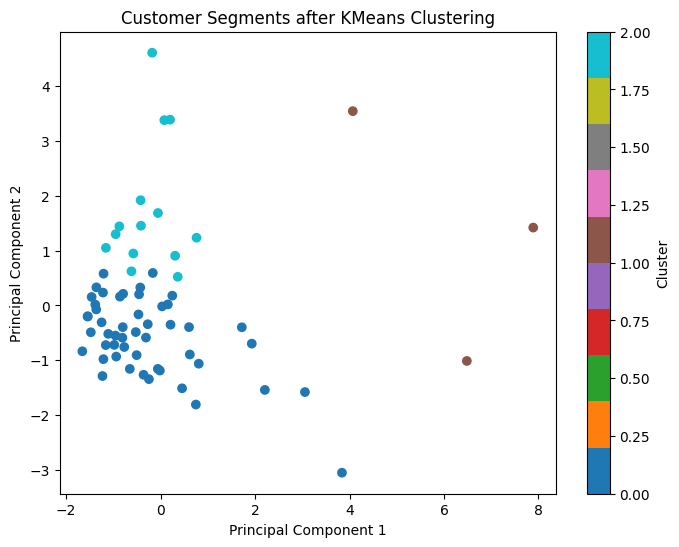

In [18]:
plt.figure(figsize = (8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c = df['Cluster'], cmap = 'tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments after KMeans Clustering')
plt.colorbar(label = 'Cluster')
plt.show()

10. Cluster Interpretation(Mean Spening)

In [24]:
cluster_profiles = df.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
cluster_profiles_df = pd.DataFrame(cluster_profiles.round(1))
cluster_profiles_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,8413.7,7460.8,10888.0,1273.0,4550.3,1272.8
1,35593.7,43017.0,45729.3,5396.7,18403.0,8335.0
2,28432.3,4570.8,5994.4,4207.6,1828.4,3470.4


In [26]:
df.to_csv('Customer Segments.csv', index = False)
print('Customer Segmentation Completed Successfully!....')

Customer Segmentation Completed Successfully!....
